In [1]:
import pandas as pd
from fastai.vision.all import *
from settings import IMAGE_DIRECTORY

In [2]:
path = IMAGE_DIRECTORY

In [3]:
dblock = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=400, min_scale=0.75))
dls = dblock.dataloaders(path, bs=64)

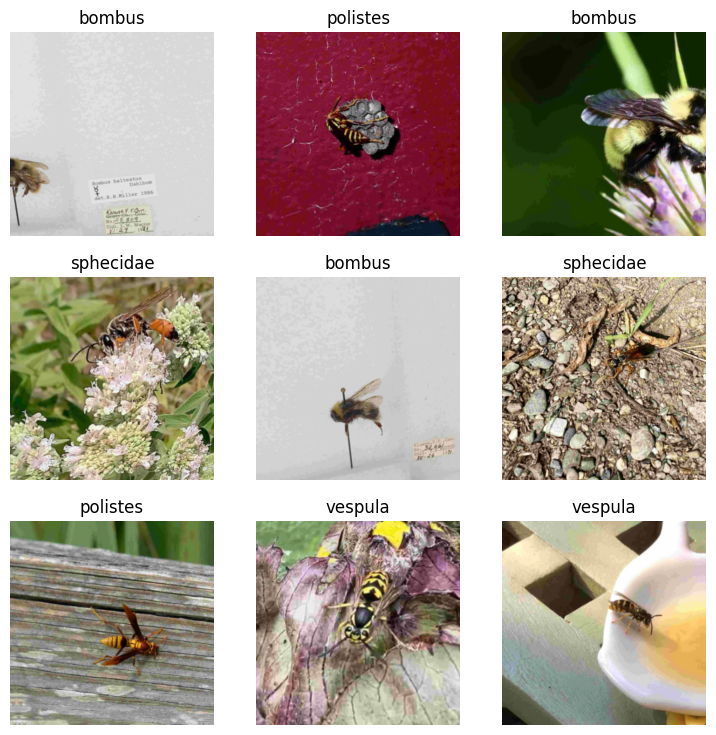

In [4]:
dls.show_batch(nrows=3, ncols=3)

In [5]:
model = xresnet18(n_out=dls.c)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.058379,2.129663,0.214488,8:39:13
